# Capstone Project: Financial Analysis 

Overview: Analyze the most important technology stocks to build a portfolio based on historical data. 
Assumptions: (1) Data I am picking is clean, free of error (2) The libraries I am using is free of error
Plan:
a) Find a way to automate the symbols scraping (can be reproduced in the future) 
b) Populate dataframes, lists and plots to be used in the future 
c) Provide meaningful analysis of different portfolio possibilities 
d) Provide conclusions and suggestions 

# Universe definition 

In [2]:
# import pandas as pd

# df = pd.read_csv('nq_screen.csv')
# symbols = list(df['Symbol'])
# # symbols

This was a bit of a pain, as I thought I could scrape directly from a website. Unstable and didn't have too much data so downloaded CSV

In [3]:
# import pandas_datareader.data as web
# from datetime import datetime as dt
# start = dt(2020,1,1)
# end = dt(2021,1,1)
# stock_data = web.DataReader(symbols, 'yahoo', start, end )
# stock_data.dropna(axis=1, how='all')

This was also a bit of a pain, because (1) The data took one million years to process (2) Many companies were NaN for the time period. 

My new universe is 10 handpicked stocks from NASDAQ MEGA (might apply this for real)

In [4]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime as dt

symbols = ['AAPL', 'MSFT', 'FB', 'NVDA', 'ASML', 'ADBE', 'NFLX', 'ORCL', 'AVGO', 'QCOM']
start = dt(2017, 1, 1)
end = dt(2021, 9, 1)
stock_data = web.DataReader(symbols, 'yahoo', start, end)
stock_data.head()

Attributes  Adj Close                                                \
Symbols          AAPL       MSFT          FB       NVDA        ASML   
Date                                                                  
2017-01-03  27.372362  58.291969  116.860001  25.173817  105.430969   
2017-01-04  27.341724  58.031147  118.690002  25.761154  104.925072   
2017-01-05  27.480770  58.031147  120.669998  25.107189  106.185074   
2017-01-06  27.787130  58.534157  123.410004  25.442804  106.070541   
2017-01-09  28.041647  58.347855  124.900002  26.474335  107.378288   

Attributes                                                            ...  \
Symbols           ADBE        NFLX       ORCL        AVGO       QCOM  ...   
Date                                                                  ...   
2017-01-03  103.480003  127.489998  35.795979  151.483856  56.099892  ...   
2017-01-04  104.139999  129.410004  35.972408  150.405121  56.159935  ...   
2017-01-05  105.910004  131.809998  35.879543  148.035248  56.228565  ...   
2017-01-06  108.300003  131.070007  35.703121  149.997375  56.211399  ...   
2017-01-09  108.570000  130.949997  36.241684  150.320145  56.314350  ...   

Attributes       Volume                                                 \
Symbols            AAPL        MSFT          FB         NVDA      ASML   
Date                                                                     
2017-01-03  115127600.0  20694100.0  20663900.0  150199600.0  874700.0   
2017-01-04   84472400.0  21340000.0  19630900.0  119922000.0  846200.0   
2017-01-05   88774400.0  24876000.0  19492200.0   98429600.0  493800.0   
2017-01-06  127007600.0  19922900.0  28545300.0   82285600.0  360200.0   
2017-01-09  134247600.0  20382700.0  22880400.0   91624800.0  554800.0   

Attributes                                                           
Symbols          ADBE        NFLX        ORCL       AVGO       QCOM  
Date                                                                 
2017-01-03  2277400.0   9437900.0  11051300.0  3209800.0  9519800.0  
2017-01-04  1712600.0   7843600.0   9545500.0  2396500.0  6221700.0  
2017-01-05  2504000.0  10185500.0  12064700.0  2486100.0  5998900.0  
2017-01-06  2625600.0  10657900.0  14829700.0  2314200.0  6749400.0  
2017-01-09  2925000.0   5771800.0  15587900.0  2026500.0  4769200.0  

[5 rows x 60 columns]

Definitely better! Now that we have our data we can start doing some cool stuff!

# Some data Viz 

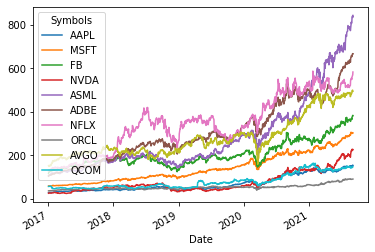

In [5]:
import matplotlib.pyplot as plt
adj_close = stock_data['Adj Close']
adj_close.plot()
plt.show()

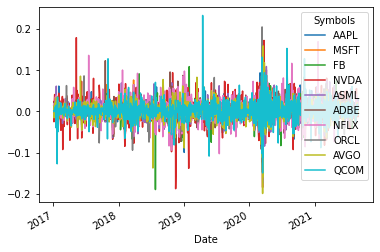

In [6]:
pct_change = adj_close.pct_change().dropna()
pct_change.plot()
plt.show()

This is not very clear, but I'm not going to bother going further for this project. Interesting to see some stocks went as far as -20% in a day!

# Some Numpy analysis 

In [7]:
# First let's convert our data to numpy arrays of percentage returns
# Would be interesting to have this format {MSFT : [ ... ], ...}
import numpy as np
# msft_array = np.array(pct_change['MSFT']) => This gives us an array of all % returns of MSFT
returns_dict = {}
# Could go for a sneaky list comprehension here but for verbosity
for symbol in symbols:
    returns_dict[symbol] = np.array(pct_change[symbol])

returns_dict


{'AAPL': array([-0.00111929,  0.00508548,  0.01114817, ...,  0.03041715,
        -0.00842472,  0.00447864]),
 'MSFT': array([-0.00447441,  0.        ,  0.00866793, ...,  0.01291203,
        -0.00563257, -0.00016569]),
 'FB': array([ 0.01565978,  0.01668208,  0.0227066 , ...,  0.02154952,
        -0.00336258,  0.00703775]),
 'NVDA': array([ 0.02333129, -0.0253857 ,  0.01336729, ...,  0.00229725,
        -0.01318105,  0.00250166]),
 'ASML': array([-0.00479838,  0.01200859, -0.00107861, ...,  0.00800802,
        -0.00780148,  0.01095986]),
 'ADBE': array([ 0.00637801,  0.01699639,  0.02256632, ...,  0.01134357,
        -0.00343846,  0.00329969]),
 'NFLX': array([ 0.01506005,  0.01854566, -0.00561407, ...,  0.01298935,
         0.00531635,  0.02262866]),
 'ORCL': array([ 0.00492876, -0.00258156, -0.00491707, ...,  0.00111918,
        -0.00357741,  0.00920004]),
 'AVGO': array([-0.00712112, -0.0157566 ,  0.01325446, ...,  0.00594832,
        -0.00336752, -0.00814543]),
 'QCOM': array([ 0.00

In [8]:
# How nice is that ! # We are going to look mostly at Apple just for the example:
returns_aapl = returns_dict['AAPL']
returns_aapl

array([-0.00111929,  0.00508548,  0.01114817, ...,  0.03041715,
       -0.00842472,  0.00447864])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   2.,   1.,   0.,   1.,   1.,   2.,   1.,   3.,
          5.,   3.,   4.,   3.,   6.,  10.,  11.,   7.,  17.,  10.,  17.,
         18.,  30.,  32.,  39.,  54.,  74., 103., 106.,  81.,  80.,  78.,
         65.,  57.,  49.,  35.,  35.,  22.,  20.,  13.,  16.,   6.,  10.,
          9.,   5.,   5.,   2.,   3.,   2.,   3.,   1.,   0.,   1.,   1.,
          1.,   0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-0.12864692, -0.12616236, -0.12367781, -0.12119326, -0.11870871,
        -0.11622416, -0.11373961, -0.11125506, -0.10877051, -0.10628596,
        -0.1038014 , -0.10131685, -0.0988323 , -0.09634775, -0.0938632 ,
        -0.09137865, -0.0888941 , -0.08640955, -0.083925  , -0.08144044,
        -0.07895589, -0.07

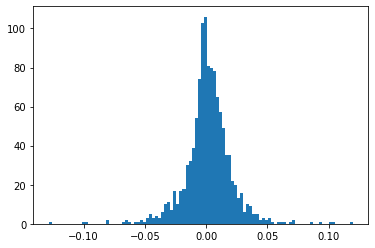

In [9]:
# How about a distribution ?
plt.hist(returns_aapl, bins=100, range=(np.min(returns_aapl), np.max(returns_aapl)))

In [10]:
# Some other semi-interesting stats
print(np.mean(returns_aapl))
print(np.std(returns_aapl))
print(np.median(returns_aapl))

0.001653559128386696
0.019448526424431508
0.0012425963662222594


Here we could do machine learning, predictive analysis or whatever but let's keep that at the portfolio level

In [11]:
# Can we compare standard deviation to estimate risk?
std_dict = {}
for symbol in symbols:
    std_dict[symbol] = np.std(returns_dict[symbol])
std_dict

{'AAPL': 0.019448526424431508,
 'MSFT': 0.017526949200438537,
 'FB': 0.020990586010903263,
 'NVDA': 0.029403483430770892,
 'ASML': 0.022233963533366347,
 'ADBE': 0.02058141792284835,
 'NFLX': 0.024445128075431415,
 'ORCL': 0.017031267044805946,
 'AVGO': 0.02240480137019279,
 'QCOM': 0.023861789503736033}

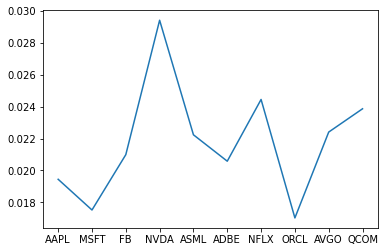

In [12]:
# And a visual representation? 
plt.plot(std_dict.keys(), std_dict.values())

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

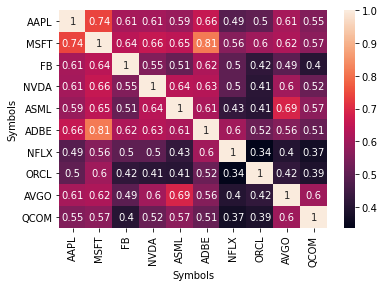

In [13]:
# Can we have a correlation matrix between assets?
import seaborn as sns
Var_Corr = pct_change.corr()
# Heatmap (shameless StackOverflow copypasta)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# Efficient frontier analysis 


The name of the game is to determine a portfolio allocation which will provide maximal risk-adjusted returns

In [58]:
# Portfolio optimization functions. Shameless copypasta from Codecademy course

import cvxopt as opt
from cvxopt import blas, solvers

def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

     pcost       dcost       gap    pres   dres
 0: -1.5157e-03 -1.0023e+00  1e+00  2e-16  3e+00
 1: -1.5161e-03 -1.2257e-02  1e-02  7e-17  4e-02
 2: -1.5468e-03 -2.3559e-03  8e-04  1e-16  3e-03
 3: -2.1837e-03 -2.6919e-03  5e-04  2e-16  8e-04
 4: -2.2316e-03 -2.2443e-03  1e-05  2e-16  2e-05
 5: -2.2397e-03 -2.2399e-03  1e-07  3e-16  2e-07
 6: -2.2398e-03 -2.2398e-03  1e-09  2e-16  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5140e-03 -1.0023e+00  1e+00  4e-16  3e+00
 1: -1.5143e-03 -1.2253e-02  1e-02  1e-16  4e-02
 2: -1.5449e-03 -2.3526e-03  8e-04  5e-17  3e-03
 3: -2.1812e-03 -2.6874e-03  5e-04  3e-16  8e-04
 4: -2.2265e-03 -2.2391e-03  1e-05  2e-16  2e-05
 5: -2.2344e-03 -2.2346e-03  1e-07  1e-16  2e-07
 6: -2.2345e-03 -2.2345e-03  1e-09  3e-20  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5120e-03 -1.0022e+00  1e+00  2e-16  3e+00
 1: -1.5124e-03 -1.2250e-02  1e-02  1e-16  4e-02
 2: -1.5429e-03 -2.3489e

 1: -1.3275e-03 -1.1909e-02  1e-02  5e-17  4e-02
 2: -1.3509e-03 -2.0011e-03  7e-04  7e-17  2e-03
 3: -1.7259e-03 -2.0091e-03  3e-04  3e-16  6e-19
 4: -1.7537e-03 -1.7911e-03  4e-05  6e-17  6e-19
 5: -1.7656e-03 -1.7669e-03  1e-06  2e-16  5e-19
 6: -1.7665e-03 -1.7666e-03  2e-08  1e-16  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.3025e-03 -1.0019e+00  1e+00  1e-16  3e+00
 1: -1.3027e-03 -1.1863e-02  1e-02  5e-17  4e-02
 2: -1.3253e-03 -1.9548e-03  6e-04  7e-17  2e-03
 3: -1.6777e-03 -1.9295e-03  3e-04  1e-16  7e-19
 4: -1.7088e-03 -1.7383e-03  3e-05  8e-17  4e-19
 5: -1.7191e-03 -1.7203e-03  1e-06  2e-16  3e-19
 6: -1.7200e-03 -1.7200e-03  5e-08  2e-16  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2747e-03 -1.0018e+00  1e+00  2e-16  3e+00
 1: -1.2749e-03 -1.1812e-02  1e-02  6e-17  4e-02
 2: -1.2966e-03 -1.9029e-03  6e-04  5e-17  2e-03
 3: -1.6288e-03 -1.8489e-03  2e-04  6e-17  6e-19
 4: -1.6604e-03 -1.6820

 7:  1.8478e-03  1.8477e-03  2e-08  9e-17  3e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.9860e-03 -9.9973e-01  1e+00  0e+00  3e+00
 1:  2.9820e-03 -9.7255e-03  1e-02  2e-16  4e-02
 2:  2.7657e-03  5.8593e-04  2e-03  6e-17  7e-03
 3:  2.3388e-03  1.7497e-03  6e-04  5e-17  5e-18
 4:  2.2657e-03  2.1779e-03  9e-05  6e-17  3e-18
 5:  2.2401e-03  2.2341e-03  6e-06  1e-16  3e-18
 6:  2.2374e-03  2.2371e-03  4e-07  3e-17  5e-18
 7:  2.2372e-03  2.2372e-03  4e-08  2e-16  4e-18
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  3.5334e-03 -9.9958e-01  1e+00  1e-16  3e+00
 1:  3.5282e-03 -9.5732e-03  1e-02  5e-17  4e-02
 2:  3.2603e-03  8.3565e-04  2e-03  5e-17  8e-03
 3:  2.7818e-03  2.1476e-03  6e-04  7e-17  4e-18
 4:  2.7024e-03  2.6088e-03  9e-05  1e-16  3e-18
 5:  2.6751e-03  2.6690e-03  6e-06  7e-17  5e-18
 6:  2.6725e-03  2.6721e-03  4e-07  6e-17  4e-18
 7:  2.6724e-03  2.6723e-03  4e-08  1e-16  3e-18
Optimal solution found.

 1:  5.7527e-02  1.2560e-02  4e-02  6e-17  1e-01
 2:  4.9636e-02  3.7487e-02  1e-02  7e-17  4e-17
 3:  4.8664e-02  4.7435e-02  1e-03  1e-16  3e-17
 4:  4.8322e-02  4.8268e-02  5e-05  6e-17  3e-17
 5:  4.8301e-02  4.8300e-02  7e-07  1e-16  4e-17
 6:  4.8301e-02  4.8301e-02  7e-09  1e-16  4e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.5068e-02 -9.7531e-01  1e+00  2e-16  3e+00
 1:  6.4220e-02  1.6195e-02  5e-02  7e-17  2e-01
 2:  5.5754e-02  4.2877e-02  1e-02  9e-17  6e-17
 3:  5.4723e-02  5.3397e-02  1e-03  2e-16  6e-17
 4:  5.4363e-02  5.4309e-02  5e-05  1e-16  4e-17
 5:  5.4342e-02  5.4341e-02  7e-07  1e-16  4e-17
 6:  5.4342e-02  5.4342e-02  7e-09  3e-17  5e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  7.2644e-02 -9.7141e-01  1e+00  0e+00  3e+00
 1:  7.1638e-02  2.0427e-02  5e-02  5e-17  2e-01
 2:  6.2612e-02  4.9136e-02  1e-02  1e-16  5e-17
 3:  6.1516e-02  6.0103e-02  1e-03  1e-16  7e-17
 4:  6.1142e-02  6.1087

 4:  7.8366e-01  7.8307e-01  6e-04  3e-07  4e-07
 5:  7.8338e-01  7.8338e-01  7e-06  3e-09  4e-09
 6:  7.8338e-01  7.8338e-01  7e-08  3e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  8.6118e-01 -2.6461e-01  1e+01  3e+00  4e+00
 1:  9.1838e-01  6.1012e-03  1e+00  8e-02  1e-01
 2:  9.0217e-01  7.4188e-01  2e-01  1e-02  1e-02
 3:  8.8334e-01  8.6936e-01  1e-02  2e-04  3e-04
 4:  8.7940e-01  8.7878e-01  6e-04  7e-07  8e-07
 5:  8.7912e-01  8.7911e-01  7e-06  7e-09  9e-09
 6:  8.7911e-01  8.7911e-01  7e-08  7e-11  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  9.6250e-01 -1.6404e-01  1e+01  3e+00  4e+00
 1:  1.0197e+00  1.1293e-01  1e+00  1e-01  1e-01
 2:  1.0097e+00  8.4224e-01  2e-01  1e-02  2e-02
 3:  9.9094e-01  9.7638e-01  1e-02  3e-04  3e-04
 4:  9.8682e-01  9.8618e-01  6e-04  1e-06  1e-06
 5:  9.8653e-01  9.8652e-01  8e-06  1e-08  2e-08
 6:  9.8653e-01  9.8653e-01  8e-08  1e-10  2e-10
Optimal solution found.

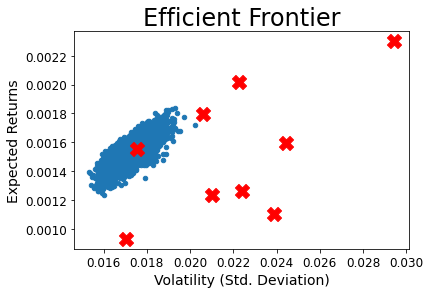

In [59]:
# Efficient frontier itself

# Find the returns for each period
returns_quarterly = pct_change.columns[1:]

# Expected returns 
expected_returns = pct_change[returns_quarterly].mean()

# Find the covariance 
cov_quarterly = pct_change[returns_quarterly].cov()

# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly)

# 6. Plot the set of random portfolios
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)

# 7. Calculate the set of portfolios on the EF
weights, returns, risks = optimal_portfolio(pct_change[returns_quarterly][1:])

# 8. Plot the set of portfolios on the EF
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=24)

# Compare the set of portfolios on the EF to the 
try:
  single_asset_std=np.sqrt(np.diagonal(cov_quarterly))
  plt.scatter(single_asset_std,expected_returns,marker='X',color='red',s=200)
except:
  pass
plt.show()